In [41]:
# importing reuired  liberaries


import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import to_categorical
from keras.utils import normalize
import neural_structured_learning as nsl

In [42]:

import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.regularizers import L1L2
dense_regularizer = L1L2(l2=0.0001)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


In [43]:
# loading the data in pandas data frame 

df = pd.read_csv('train.csv')

In [44]:
# view the data
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# asigning the labels to y varaible
y = np.array(df['label'])

In [46]:
# assiging pixel values to the x_ varibla as features

x_=np.array(df.drop(['label'],axis=1))

In [47]:
# avoiding the list shape of y
y = y.reshape(y.shape[0],1)

In [48]:
# lets see an example 
test = x_[0]

In [49]:
# reshapping it in an image king format
test = test.reshape(28,28)

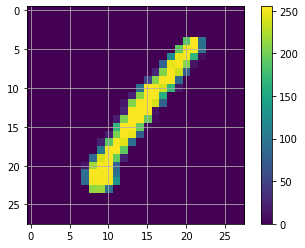

In [50]:
# visualizing our training example

plt.imshow(test)
plt.colorbar()
plt.grid(True)
plt.show()


In [51]:
# reshaping our flattend pixel values to image kind format

x= x_.reshape(-1,28,28,1)

In [52]:
# describes our data
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [53]:
# checking for any nan values in our data column wise

df.isna().any()[lambda x: x]

Series([], dtype: bool)

In [54]:
# normalizing our data
x_n = x/255

In [70]:
# import linberaries for our model
from keras import Sequential
from keras.layers import Dense,LeakyReLU,Flatten


In [71]:
# makeing a convolutional net

model = Sequential()
model.add(Conv2D(32, (5,5),activation='relu',input_shape=x_n.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3) ,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3) ,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [72]:
# summary of our model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
batch_normalization_22 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_23 (Batc (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 12, 12, 64)       

In [ ]:
# implemeting an adverserial network 
# adding some noise to avoid overfitting

# adv_config = nsl.configs.make_adv_reg_config(multiplier = 0.2,adv_step_size = 0.05)
# adv_model = nsl.keras.AdversarialRegularization(model,adv_config)

In [73]:
# using data agmentation
# to increase the varity of examples by flipping ,zoming, distorting ,etc

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


In [74]:
# doing data agmentation on our pixel values
datagen.fit(x_n)

In [75]:
# optimizing and compiling  our model
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# compiling our adverserial net
# adv_model.compile(optimizer ='adam' , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [76]:
# making our labels in matrix having boolian values 
y_n = to_categorical(y, num_classes = 10)

In [77]:
# fitting our model on our trainig data
model.fit(datagen.flow(x_n,y_n, batch_size=86),epochs=10)


Epoch 1/10
489/489 [==============================] - 14s 29ms/step - loss: 0.3466 - accuracy: 0.9005
Epoch 2/10
489/489 [==============================] - 13s 27ms/step - loss: 0.1021 - accuracy: 0.9697
Epoch 3/10
489/489 [==============================] - 13s 27ms/step - loss: 0.0758 - accuracy: 0.9771
Epoch 4/10
489/489 [==============================] - 13s 27ms/step - loss: 0.0655 - accuracy: 0.9804
Epoch 5/10
489/489 [==============================] - 13s 27ms/step - loss: 0.0530 - accuracy: 0.9839
Epoch 6/10
489/489 [==============================] - 13s 27ms/step - loss: 0.0495 - accuracy: 0.9844
Epoch 7/10
489/489 [==============================] - 13s 27ms/step - loss: 0.0486 - accuracy: 0.9853
Epoch 8/10
489/489 [==============================] - 13s 27ms/step - loss: 0.0434 - accuracy: 0.9864
Epoch 9/10
489/489 [==============================] - 13s 27ms/step - loss: 0.0399 - accuracy: 0.9878
Epoch 10/10
489/489 [==============================] - 13s 27ms/step - loss: 0.042

In [ ]:
# fitting our model on training data
# adv_model.fit(datagen.flow(x_n,y_n, batch_size=86),epochs=10)

In [36]:
# importing liberary for saving our trained model
from sklearn.externals import joblib

C:\Users\91946\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [37]:
# creating variable to hold the filename
joblib_file = "model_for_digits21.pkl"


In [38]:
# saving our model in that file
joblib.dump(model,joblib_file)

['model_for_digits21.pkl']

In [39]:
# loading our trained model
model1 = joblib.load(joblib_file)

In [40]:
# loading the test data
df_test = pd.read_csv('test.csv')

In [41]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# getting the pixels 
x_test=np.array(df_test)

In [43]:
x_test.shape

(28000, 784)

In [44]:
# reshaping tham to image kind matrix
x_test_n = x_test.reshape(-1,28,28,1)

In [45]:
# checking for null values 
df_test.isna().any()[lambda x: x]

Series([], dtype: bool)

In [46]:
# normalizing 
x_test_n= x_test_n/255

In [47]:
# predicting labels
ypred = model1.predict(x_test_n)

In [48]:
final = np.zeros((ypred.shape[0],2))

In [49]:
# converting our boolean labels into numbers
for i in range(ypred.shape[0]):
    final[i][1] = np.argmax(ypred[i])
    final[i][0] = i+1

In [50]:
# saaving the prediction values in prediction.csv file
prediction = pd.DataFrame(final, columns=['Label','img']).to_csv('prediction.csv')